Logistic regression with Smote+EditedKNN & Smote+TomekLink

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv("../2_Data_Clean/hr/train_data.csv")

In [3]:
X = train_data.drop(["Class"], axis = 1)
y = train_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 7)


In [4]:
X = train_data.drop(["Class"], axis = 1)
y = train_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = y, random_state = 7)

In [5]:
from imblearn.combine import SMOTETomek

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
sampler = SMOTETomek()
X_resample, y_resample = sampler.fit_sample(X_train, y_train)

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV

In [8]:
pipe = make_pipeline(StandardScaler(),LogisticRegression())

param_grid = {
    'logisticregression__C':expon(scale = 2),
    'logisticregression__penalty':['l1','l2']
}

random_cv = RandomizedSearchCV(estimator= pipe,param_distributions = param_grid, cv =10, error_score = 0,
                               n_iter = 10 , scoring = 'f1',return_train_score=True, n_jobs = 2)

In [9]:
X_resample.shape

(277662, 31)

In [10]:
random_cv.fit(X_resample, y_resample)

RandomizedSearchCV(cv=10, error_score=0,
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=2,
          param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd0d6dc390>, 'logisticregression__penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='f1', verbose=0)

In [11]:
random_cv.best_score_

0.9845843380943305

In [12]:
random_cv.best_params_

{'logisticregression__C': 3.7348800204344865,
 'logisticregression__penalty': 'l2'}

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_pred = random_cv.predict(X_test)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(51,0.5,'True value')

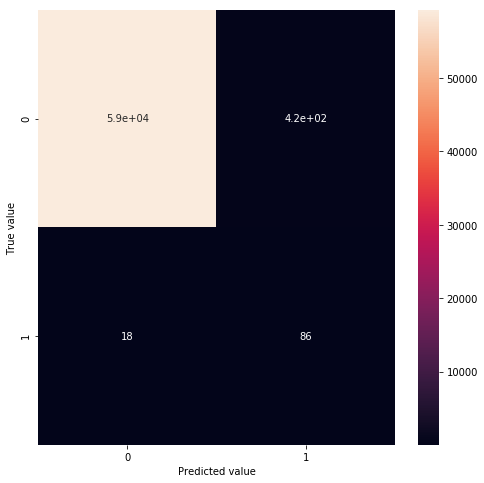

In [27]:
plt.figure(figsize= (8,8))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted value")
plt.ylabel("True value")

In [17]:
print("The total time used is {} hrs.".format(random_cv.cv_results_['mean_fit_time'].sum()*10/3600))

The total time used is 0.5745173046323988 hrs.


In [20]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_true = y_test, y_pred = y_pred))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     59706
          1       0.17      0.83      0.28       104

avg / total       1.00      0.99      1.00     59810



In [24]:
y_pred_train = random_cv.predict(X_train)
print(classification_report(y_true = y_train, y_pred = y_pred_train))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00    139313
          1       0.18      0.90      0.30       241

avg / total       1.00      0.99      1.00    139554



In [25]:
y_pred_resample = random_cv.predict(X_resample)
print(classification_report(y_true = y_resample, y_pred = y_pred_resample))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98    138831
          1       0.99      0.98      0.98    138831

avg / total       0.98      0.98      0.98    277662

